In [1]:
import pandas as pd
import numpy as np
import keras

## Análisis Descriptivo

### 1. Importación del conjunto de datos y visualización de las primeras filas del conjunto de datos

In [8]:
df = pd.read_csv("/content/sample_data/IMDB Dataset.csv")
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


### 2. Descripción del conjunto de datos

In [9]:
print(df.describe())

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


### 3. Recuento de sentimientos

In [10]:
print("Total :\n", df['sentiment'].value_counts())

Total :
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


## Preprocesamiento de las secuencias

### 1. Inicialización de listas y bucle de iteración para almacenar revisiones

In [11]:
review = []
sentences = list(df['review'])
for sen in sentences:
  review.append(sen)

### 2. Creación de etiquetas

In [12]:
labels = df['sentiment']
labels = np.array(list(map(lambda x: 1 if x =="positive" else 0, labels)))

### 3. División de datos de entrenamiento y prueba

In [13]:
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.2)

## Tokenización y generación de secuencias

### 1. Parámetros de configuración

In [14]:
vocab_size = 1000
max_length = 120
embedding_dim = 16
trunc_type = 'post'
oov_tok = "<OOV>"

### 2. Tokenizado y acolchado de secuencias

In [15]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Initialize the tokenizer class
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# Generate the word index dictionary for training sentences
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences, maxlen = max_length, truncating= trunc_type)

# Generate and pad the test sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen = max_length, truncating=trunc_type)

## Construcción y entrenamiento del modelo

### 1. Construcción del modelo

In [16]:
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

### 2. Compilación y resumen del modelo

In [17]:
# Setup the training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           16000     
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 64)                122944    
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 139009 (543.00 KB)
Trainable params: 139009 (543.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 3. Entrenamiento del modelo

Epoch 1/10
1250/1250 [==============================] - 6s 4ms/step - loss: 0.4738 - accuracy: 0.7641 - val_loss: 0.4049 - val_accuracy: 0.8167
Epoch 2/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.3720 - accuracy: 0.8342 - val_loss: 0.4210 - val_accuracy: 0.8067
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3123 - accuracy: 0.8637 - val_loss: 0.4651 - val_accuracy: 0.7957
Epoch 4/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.2484 - accuracy: 0.8958 - val_loss: 0.5392 - val_accuracy: 0.7813
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1846 - accuracy: 0.9270 - val_loss: 0.6577 - val_accuracy: 0.7786
Epoch 6/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.1242 - accuracy: 0.9546 - val_loss: 0.8244 - val_accuracy: 0.7758
Epoch 7/10
1250/1250 [==============================] - 6s 4ms/step - loss: 0.0760 - accuracy: 0.9745 - val_loss: 1.0149 - val_accuracy:

<Axes: >

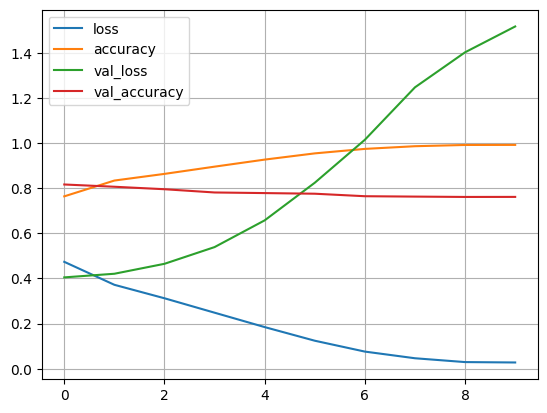

In [18]:
# Train the model
num_epochs = 10
history = model.fit(padded,
                    train_labels,
                    epochs = num_epochs,
                    validation_data=(test_padded, test_labels))

# Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(grid=True)

## Preguntas

1. ¿Qué hace el código en general?
2. ¿Cuál es el propósito de cada parte del código?
3. ¿Por qué se utilizan los parámetros especícos en cada función (por ejemplo,
num_words, embedding_dim, input_length, loss, optimizer, etc.)?
4. ¿Cuál es la diferencia entre train_sentences y test_sentences?
5. ¿Qué signican vocab_size, max_length, embedding_dim y oov_tok?
6. ¿Por qué se utilizan las capas Embedding, Flatten, Dense y sigmoid en el modelo?
7. ¿Qué representan las métricas de pérdida y precisión en el modelo?
8. ¿Qué pasa durante el entrenamiento del modelo?
9. ¿Qué signican las épocas y cómo afectan al proceso de entrenamiento?
10. ¿Por qué es importante la validación del modelo utilizando los datos de prueba?
11. ¿Cuál es el objetivo nal del código?

## Ejercicios
1. Modica los parámetros del modelo (como el tamaño del vocabulario, la longitud máxima, la
dimensión de incrustación, etc.) y observa cómo afecta al rendimiento del modelo.
2. Experimenta con diferentes arquitecturas de modelos (agregando o eliminando capas,
cambiando las funciones de activación, etc.) y observa cómo afecta al rendimiento.
3. Intenta utilizar un algoritmo de optimización diferente y observa cómo afecta al rendimiento
del modelo.
4. Divide los datos en diferentes proporciones para entrenamiento y prueba y observa cómo
afecta al rendimiento del modelo.
5. Explora otras métricas de evaluación del modelo y compara su rendimiento con las métricas
existentes
